# EXOPLANETS IV: Finding planets in transit data from the Kepler mission

We will use data from the Kepler mission to discover exoplanets and determine some of their properties. Kepler was a mission that observed hundreds of thousands of stars looking for transits.

The data are in the Exoplanets directory on github. They are labeled as EPIC...txt and they correspond to observations of different single stars (these are called *light curves*). These are ascii files and you can open up with an editor. If you open them up you can see that the first line contains the header. There are two columns of data. The first colum shows the time of the observation (in days from the one given on the header; this is the Barycentric Julian Date (BJD)) and the 2nd column the relative stellar flux. 


Firstly, you need to read these data and put them into two arrays (time and flux). Be careful of the commas in the file! Start with file EPIC206103150.txt which corresponds to star EPIC 206103150 . The code to use is given below.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('EPIC206103150.txt', delimiter=",",usecols=range(2), names=['time','flux'], skiprows=[0])

#convert columns to np.arrays
#time units is days

time=np.array(data['time'])
flux=np.array(data['flux'])

#check how many values you have in each array
print (np.size(time))


2913


## Task IV-1

After you have imported the data plot the stellar relative flux versus time (in days) for the whole duration of the observation. Before doing this convert the time from days to hours (transits typically last a few hours). Put labels on your graph.

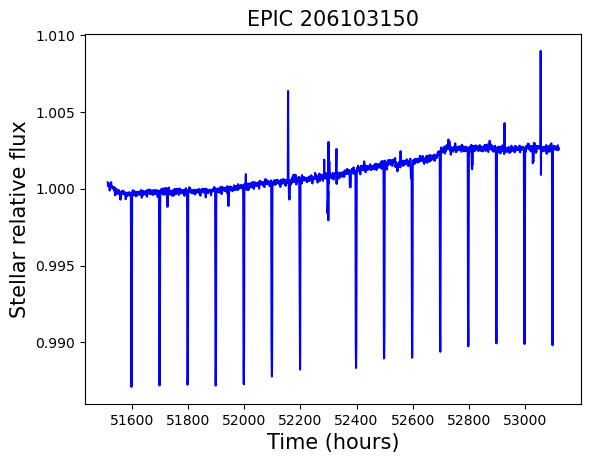

In [3]:

#convert time from days to hours
time=24*time

plt.title ("EPIC 206103150", fontsize = 15)
plt.xlabel("Time (hours)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)
plt.plot(time, flux,color='blue')
plt.show()


## Task IV-2

Identify how many planets there are in the system. Remember the each planet has a characteristic transit curve (i.e. specific duration, depth). Note that the stellar brightnetss may vary.

You many need to change the axis limits in to see smaller planets.

Produce a graph for each planet to clearly show two transits per each planet that exists in the system (by changing the limits of x, y axes)

There are at least two planets in the system.

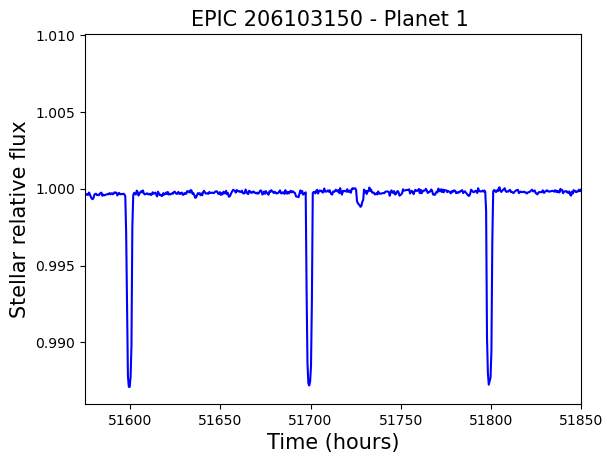

In [4]:
#planet 1

plt.title ("EPIC 206103150 - Planet 1 ", fontsize = 15)
plt.xlabel("Time (hours)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)
plt.xlim(51575, 51850)
plt.plot(time, flux,color='blue')
plt.show()

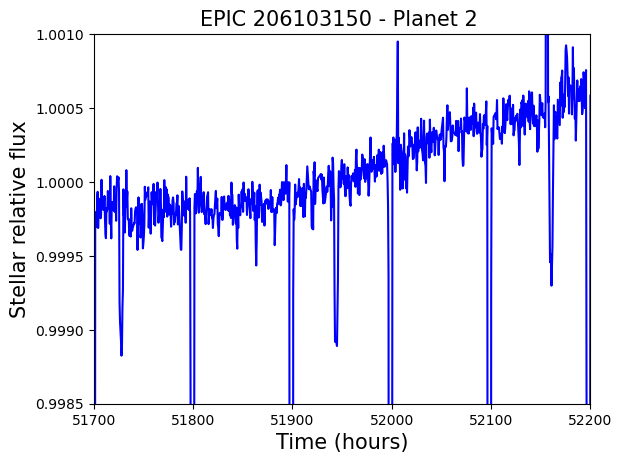

In [5]:
#planet 2

plt.title ("EPIC 206103150 - Planet 2 ", fontsize = 15)
plt.xlabel("Time (hours)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)
plt.ylim(0.9985, 1.001)
plt.xlim(51700, 52200)
plt.plot(time, flux,color='blue')
plt.show()

## Task IV-3

Choose 2 transits for each planet. Calculate the the period of the planet and the depth of the transit (note that the relative flux of the star changes with time). You need to focus on two consequtive transits and measure the depth (in relation to the stellar flux before/after the transit) and the time when this happens. To help you with this task, you can take the following suggested steps (you can do it your own way too! be creative!)

***Step 1:*** Define a function that plots a transit between two times and fixes the y axis limits (that you can use muplitple times for different transits).

***Step 2:*** Define a function that returns the indices of the array for two given times time1 and time2 (i.e. you input time1 and time2 and you get back the corresponding indices of the array with these time values)

***Step 3:***  Define a function that returns the average relative stellar flux between two times time1, time2 set by the user (you can use that to calculate the average relative flux before and after the transit)

***Step 4:*** Define a fucntion that calculates the time of the transit (where the minimum relative stellar flux occurs) and its *uncorrected depth*, with the user defining the time range to examine (time1, time2 around the transit)

***Step 5:*** Using all the above, plot two consequtive transits, and find the period of the planet (time difference between two transits) and the corrected transit depth. There are two planets in EPIC 206103150, so you will have to do this twice, one for each planet (obviously you can use the the same functions).

#### Step 1: 

Function that plots a transit between two times and fixes the y axis

In [6]:
#define plot function

def plot_transit(time1, time2,depth1, depth2):
    plt.ylim(depth1, depth2)
    plt.xlim(time1, time2)
    plt.plot(time, flux,color='blue')
    plt.xlabel("Time (hours)", fontsize = 15)
    plt.ylabel("Stellar relative flux", fontsize = 15)
    plt.show()


Now we can focus on the first transit. We see that it happens around time (51690,51720), so we plot with these limits.

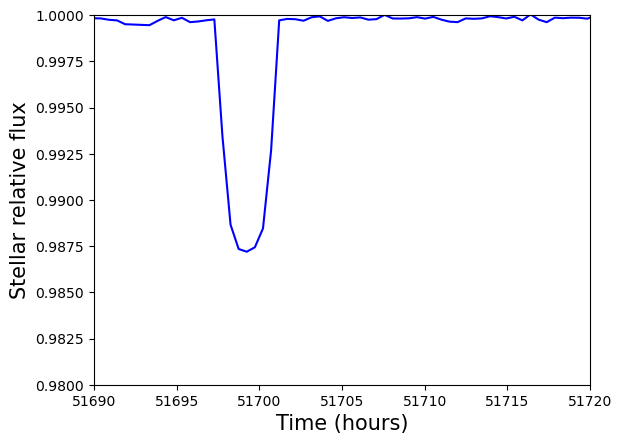

In [7]:
#plot the first transit

plot_transit(51690,51720,0.98, 1)

We need to find the depth and the time of the transit (i.e. the time when the flux is minimum). The relative stellar flux is around 1 but this may change for as the brightness of the star may change with time, so we will need to find the *corrected relative stellar flux*. So we first need to calculate the average  relative stellar flux just before and just after the transit.


### Step 2:

We define a function that returns the indices of the array for two given times time1 and time2

In [8]:
def time_indices(time1, time2):
    "A function to find indices corresponding to specified times"
    i=0
    k=0
    if (time1>time[0]):
        while time[i]<time1:
            i=i+1
        index1=i
    else:
        index1=0

    if (time2<time[np.size(time)-1]):
        while time[k]<time2:
            k=k+1
        index2=k
    else:
        index2=np.size(time)-1

    return index1, index2


### Step 3:

We define a function that returns the average relative stellar flux between two times time1, time2 set by the user (use the functiion you defined before)

In [9]:
def average_stellar_flux(time1,time2):

    indices=time_indices(time1,time2)
    index1=indices[0]
    index2=indices[1]

    average=np.average(flux[index1:index2])
    return average

### Step 4:

Finally, we define a fucntion that calculates the time of the transit and its *uncorrected depth* with the user defining the time range to examine (time1, time2 around the transit)

In [10]:
def transit_properties (time1, time2):
    "A function to find selected transit time and depth"
   #find the indices of the given times
    indices=time_indices(time1,time2)
    index1=indices[0]
    index2=indices[1]

    #find the miniumum of flux within the given indices/times
    t_flux=np.min(flux[index1:index2])
    #find the index of the minimum flux
    index=np.argmin(flux[index1:index2])
    #find the index of the time where the flux is minimum
    t_time=time[index1+index]

    return t_time, t_flux


Now we have all the tools to find the properties of the transits and derive some of the properties of the exoplanets that cause them.

### Step 5:

Plot two consequtive transits, and find the period of the planet (time difference between two transits) and the corrected transit depth. 

Let's plot again the transit, making sure we have two transits on the graph

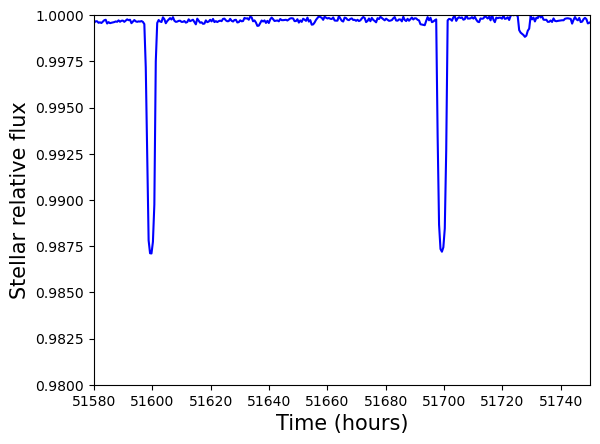

In [11]:
plot_transit(51580,51750,0.98, 1)

In [12]:
#select two times before and after the first transit (roughly)

transit1=transit_properties(5180,51620)

#select two times before and after the second trasit (roughly)

transit2=transit_properties(51650,51750)

#the first element of transit1[0], transit2[0] is the time of the transit
# we can use those to find the period of the planet
p_planet1= transit2[0]-transit1[0]

#print to check if it looks OK
print("Planet period: %.4f" %p_planet1, "hours")

# the second element transit1[1] is the uncorrected flux

# we calculate the average flux just before and just after the (first) transit 
stellar_flux=0.5*(average_stellar_flux(51690,51695)+average_stellar_flux(51690,51695))

#print to check if it looks OK
print("average stellar flux: %.4f" %stellar_flux)

# we then calculate the corrected (real) transit depth
transit_depth=stellar_flux-transit1[1]

#print to check if it looks OK
print("Transit corrected depth: %.4f" %transit_depth)

Planet period: 99.5446 hours
average stellar flux: 0.9997
Transit corrected depth: 0.0126


## Task IV-4

1. Define a function that uses the transit depth and stellar radius and calculate the radius of the planet (use the Equation provided in Exoplanets-III), in units of the radius of Jupiter (note that $1 R_{\rm J}=0.1R_\odot$)


2. Define a function that uses the transit period and  the stellar radius to calculate the orbital radius of the planet (use the 3rd Kepler law, see Exoplanets-I) (in AU)

3. Calculate the radius and the orbital period of the planet relating to the transit you just analysed

You will need some information about the properties of the stars that are given in the following table

| Stellar name  | Mass (in $M_\odot$) | Radius (in $R_\odot$) |
| :- | :-: | :-:|
| EPIC 206103150 (K2-23) | 1.03 | 1.15 |
| EPIC 212803289 (K2-99)| 1.60 | 3.10 |
| EPIC 249624646 (K2-290) | 1.19 | 1.51 |




In [13]:
def planet_radius(transit_depth,stellar_radius):
     "Find planet radius (in units of Jupiter radii) from transit dept"
     R_jup=0.10045
     return(stellar_radius/R_jup*np.sqrt(transit_depth))


def planet_orbital_radius(period, stellar_mass):
    # we need period in years for Kepler's 3rd law
    # convert from hours to years
    period=period/365/24
    return(np.power(period**2*stellar_mass,1/3.))


star_mass=1.03
star_radius=1.15

r_planet1= planet_radius(transit_depth,star_radius)
a_planet1=planet_orbital_radius (p_planet1,star_mass)

#print to see if they are OK

#print to check if it looks OK
print("Planet period: %.4f hours (%.4f days)" %(p_planet1,p_planet1/24))
print ("Planet radius: %.4f R_J" %r_planet1)
print ("Planet orbital radius: %.4f AU" %a_planet1)


Planet period: 99.5446 hours (4.1477 days)
Planet radius: 1.2846 R_J
Planet orbital radius: 0.0510 AU


### Planet 2 in EPIC 206103150

Analyse the transits of the second planet and find its properties

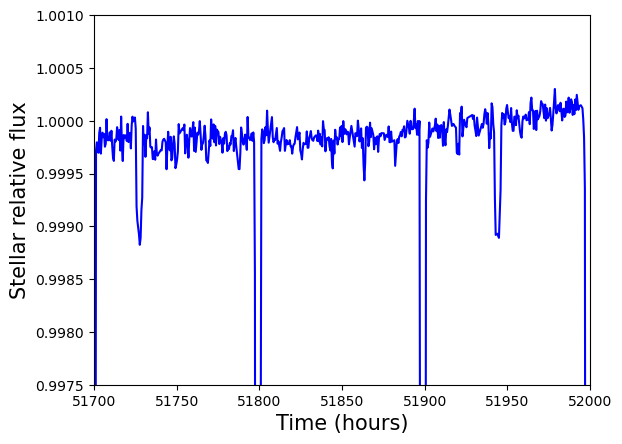

In [14]:
plot_transit(51700,52000,0.9975, 1.001)

In [15]:
#select two times before and after the first transit (roughly)

transit1=transit_properties(51710,51740)

#select two times before and after the first trasit (roughly)

transit2=transit_properties(51910,51960)

#the first element of transit1[0], transit2[0] is the time of the transit
# we can use those to find the period of the transit
p_planet2= transit2[0]-transit1[0]

#print to check if it looks OK
print("Planet period: %.4f" %p_planet2, "hours")

# the second element transit1[1] is the uncorrected flux

# we calculate the average flux just before and just after the (first) transit 
stellar_flux=0.5*(average_stellar_flux(51710,51720)+average_stellar_flux(51730,51750))

#print to check if it looks OK
print("average stellar flux: %.4f" %stellar_flux)

# we then calculate the corrected (real) transit depth
transit_depth=stellar_flux-transit1[1]

#print to check if it looks OK
print("Transit corrected depth: %.4f" %transit_depth)

Planet period: 217.2311 hours
average stellar flux: 0.9998
Transit corrected depth: 0.0010


In [16]:
r_planet2= planet_radius(transit_depth,1.15)
a_planet2=planet_orbital_radius (p_planet2,1.03)


#print to check if it looks OK
print("Planet period: %.4f hours (%.4f days)" %(p_planet2,p_planet2/24))
print ("Planet radius: %.4f R_J" %r_planet2)
print ("Planet orbital radius: %.4f AU" %a_planet2)

Planet period: 217.2311 hours (9.0513 days)
Planet radius: 0.3547 R_J
Planet orbital radius: 0.0859 AU


### Task IV-5

Repeat this for 2 more systems from the given list. 

### EPIC  212803289

3529


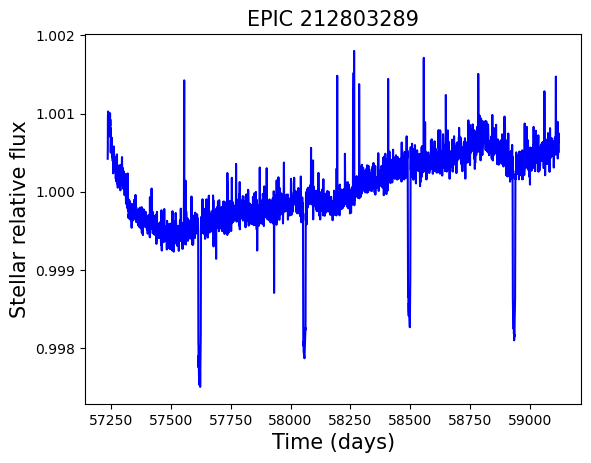

In [17]:
data = pd.read_csv('EPIC212803289.txt', delimiter=",",usecols=range(2), names=['time','flux'], skiprows=[0])

#convert columns to np.arrays
time=np.array(data['time'])
flux=np.array(data['flux'])

#check how many values you have in each array
print (np.size(time))

#convert time from days to hours
time=24*time

plt.title ("EPIC 212803289", fontsize = 15)
plt.xlabel("Time (days)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)
plt.plot(time, flux,color='blue')
plt.show()


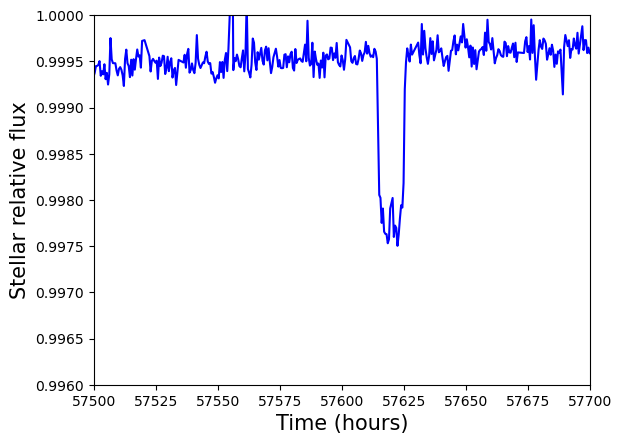

In [18]:
plot_transit(57500,57700,0.996, 1.00)

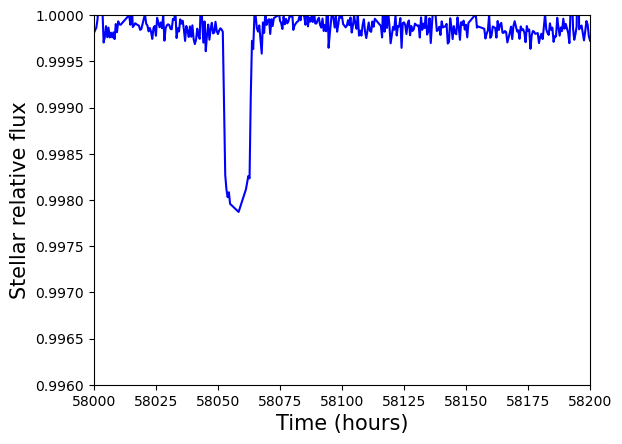

In [19]:
plot_transit(58000,58200,0.996, 1.00)

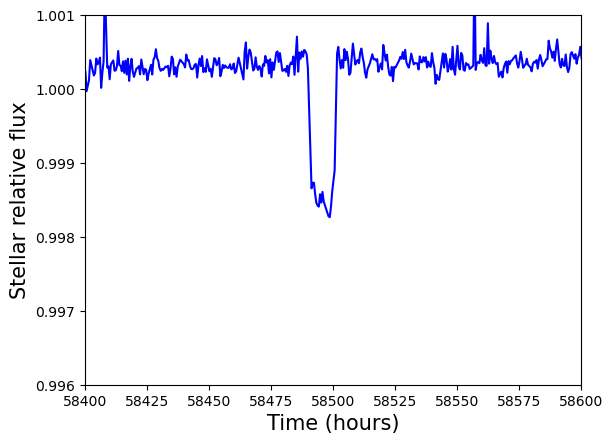

In [20]:
plot_transit(58400,58600,0.996, 1.001)

In [21]:
# We will use the last two ones as the first one is a bit noisy

#select two times before and after the first transit (roughly)

transit1=transit_properties(58000,58200)

#select two times before and after the first trasit (roughly)

transit2=transit_properties(58400,58600)

#the first element of transit1[0], transit2[0] is the time of the transit
# we can use those to find the period of the transit
p_planet3= transit2[0]-transit1[0]

#print to check if it looks OK
print("Planet period: %.4f" %p_planet3, "hours")

# the second element transit1[1] is the uncorrected flux

# we calculate the average flux just before and just after the (first) transit 
stellar_flux=0.5*(average_stellar_flux(58020,58040)+average_stellar_flux(58070,58090))

#print to check if it looks OK
print("average stellar flux: %.4f" %stellar_flux)

# we then calculate the corrected (real) transit depth
transit_depth=stellar_flux-transit1[1]

#print to check if it looks OK
print("Transit corrected depth: %.4f" %transit_depth)

Planet period: 440.3439 hours
average stellar flux: 0.9999
Transit corrected depth: 0.0020


In [22]:
star_mass=1.6
star_radius=3.10

r_planet3= planet_radius(transit_depth,star_radius)
a_planet3=planet_orbital_radius (p_planet3,star_mass)


#print to check if it looks OK
print("Planet period: %.4f hours (%.4f days)" %(p_planet3,p_planet3/24))
print ("Planet radius: %.4f R_J" %r_planet3)
print ("Planet orbital radius: %.4f AU" %a_planet3)

Planet period: 440.3439 hours (18.3477 days)
Planet radius: 1.3959 R_J
Planet orbital radius: 0.1593 AU


### EPIC 249624646

3909


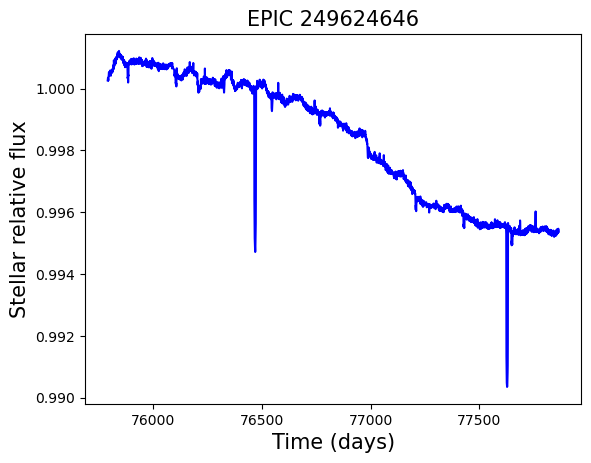

In [23]:
data = pd.read_csv('EPIC249624646.txt', delimiter=",",usecols=range(2), names=['time','flux'], skiprows=[0])

#convert columns to np.arrays
time=np.array(data['time'])
flux=np.array(data['flux'])

#check how many values you have in each array
print (np.size(time))

#convert time from days to hours
time=24*time

plt.title ("EPIC 249624646", fontsize = 15)
plt.xlabel("Time (days)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)
plt.plot(time, flux,color='blue')
plt.show()

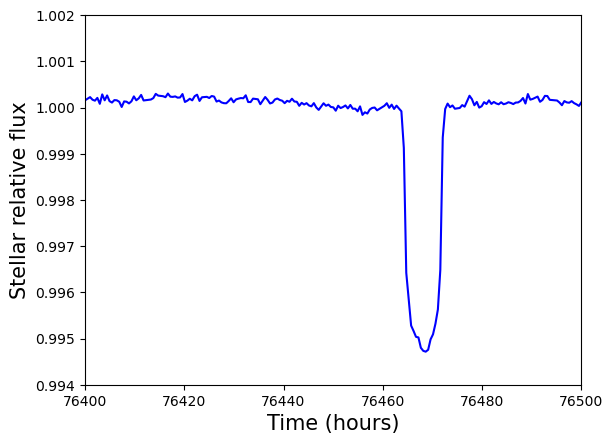

In [24]:
plot_transit(76400,76500,0.994, 1.002)

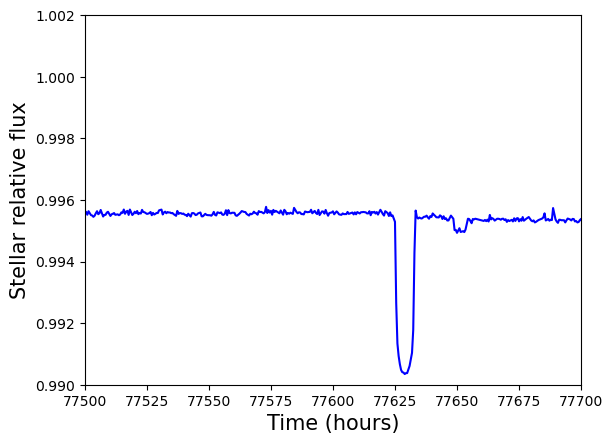

In [25]:
plot_transit(77500,77700,0.99, 1.002)

In [26]:
#select two times before and after the first transit (roughly)

transit1=transit_properties(76400,76500)

#select two times before and after the first trasit (roughly)

transit2=transit_properties(77500,77700)

#the first element of transit1[0], transit2[0] is the time of the transit
# we can use those to find the period of the transit
p_planet4= transit2[0]-transit1[0]

#print to check if it looks OK
print("Planet period: %.4f" %p_planet4, "hours")

# the second element transit1[1] is the uncorrected flux

# we calculate the average flux just before and just after the (first) transit 
stellar_flux=0.5*(average_stellar_flux(76440,76460)+average_stellar_flux(76480,76490))

#print to check if it looks OK
print("average stellar flux: %.4f" %stellar_flux)

# we then calculate the corrected (real) transit depth
transit_depth=stellar_flux-transit1[1]

#print to check if it looks OK
print("Transit corrected depth: %.4f" %transit_depth)

Planet period: 1160.1926 hours
average stellar flux: 1.0001
Transit corrected depth: 0.0054


In [27]:
star_mass=1.19
star_radius=1.51

r_planet4= planet_radius(transit_depth,star_radius)
a_planet4=planet_orbital_radius (p_planet4,star_mass)


#print to check if it looks OK
print("Planet period: %.4f hours (%.4f days)" %(p_planet4,p_planet4/24))
print ("Planet radius: %.4f R_J" %r_planet4)
print ("Planet orbital radius: %.4f AU" %a_planet4)

Planet period: 1160.1926 hours (48.3414 days)
Planet radius: 1.1001 R_J
Planet orbital radius: 0.2753 AU


## Task IV-6

Make a table with your planet properties and compare the values you have found with the ones in the literature. You can use any of the below:


[Exoplanet.eu](http://exoplanet.eu)

[Open Exoplanet Catalogue] (http://www.openexoplanetcatalogue.com)

[NASA Exoplanet Archive] (https://exoplanetarchive.ipac.caltech.edu)

Watch out as the parent stars may have more than one names!









| Star  | Mass (in $M_\odot$) | Radius (in $R_\odot$) | Planet radius ($M_J)$ | Planet period (days) | Planet orbital radius(AU)
| :- | :-: | :-:|:-:|:-:|:-:|
| [EPIC 206103150] (http://www.openexoplanetcatalogue.com/planet/WASP-47%20c/) | 1.03 | 1.15 | 1.28 ($\color{red}{\text{1.14}}$) | 4.15 ($\color{red}{\text{4.16}}$) | 0.051 ($\color{red}{\text{0.051}}$)|
| [EPIC 206103150] (http://www.openexoplanetcatalogue.com/planet/WASP-47%20c/) | 1.03 | 1.15 | 0.35  ($\color{red}{\text{0.32}}$)| 9.05 ($\color{red}{\text{9.03}}$) |0.086 ($\color{red}{\text{0.088}}$)|
| [EPIC 212803289] (http://www.openexoplanetcatalogue.com/planet/K2-99%20b/)   | 1.60 | 3.10 | 1.40  ($\color{red}{\text{1.29}}$)| 18.35 ($\color{red}{\text{18.25}}$)|0.159 ($\color{red}{\text{0.159}}$)|
| [EPIC 249624646] (http://openexoplanetcatalogue.com/planet/K2-290%20b/)      | 1.19 | 1.51 | 1.10  ($\color{red}{\text{1.01}}$)| 48.34  ($\color{red}{\text{48.37}}$)|0.28 ($\color{red}{\text{0.305}}$)|

Red colour shows the literature values.

## Task IV-7
 
Plot the planets on the distance-Mstar graph to see whether they are in the habitable zone (assume Earth-like albdedo $A=0.36$)  

### Step 1

Put all the stellar mass values in an array. Also make arrays for the planet orbital radii (4 elements for each array for each star-planet pair)

In [28]:
m_star=np.array([1.03, 1.03,1.6,1.19])
a_planet=np.array([a_planet1, a_planet2, a_planet3, a_planet4])

### Step 2

Plot these planets on the distance-Mstar graph from Exoplanets-II to see whether they are in the habitable zone (assume Earth-like albdedo $A=0.36$) 

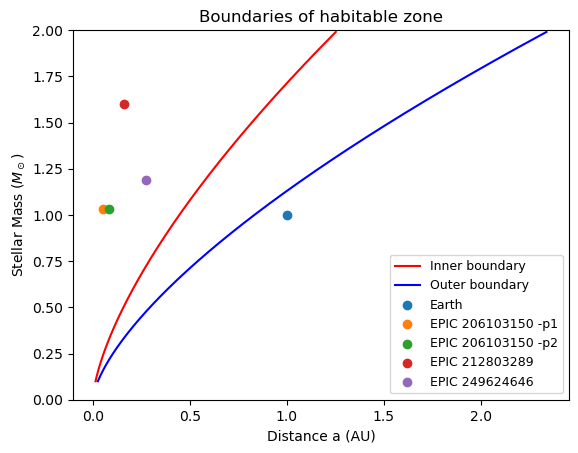

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def boundary(mstar, albedo, temp):
    "Calculate distance (in AU) for a given temperature"

    #define constants to be used
    sigma=5.67e-8
    Lsun=3.84e26
    au=1.496e11    

    #calculate the luminosity of the star and convert to SI units
    Lstar=mstar**3*Lsun
    #calculate distance
    a=np.sqrt(Lstar*(1.-albedo)/(16*np.pi*sigma))*np.power(temp,-2)
    #convert distance to AU
    a=a/au
    return a
    
# assume a value for the albedo
albedo=0.36

#create a range of stellar masses 
mstar=np.arange(0.1,2,0.01)

#calcuate inner and outer boundary using the function defined previoulsy
a_inner=boundary(mstar, albedo, 373.)
a_outer=boundary(mstar, albedo, 273.)

# make the plot
#set axis labels
plt.xlabel('Distance a (AU)')
plt.ylabel('Stellar Mass ($M_\odot$)')

#set axes limits
#plt.xlim (0.01, 3)
plt.ylim (0, 2)

#graph title
plt.title('Boundaries of habitable zone')

#plot inner boundary
plt.plot(a_inner, mstar, color='red', label="Inner boundary")
#plot outer boundary
plt.plot(a_outer, mstar, color='blue', label="Outer boundary")
#plot Earth
plt.scatter(1,1,label='Earth')

plt.scatter(a_planet[0], m_star[0],label='EPIC 206103150 -p1')
plt.scatter(a_planet[1], m_star[1],label='EPIC 206103150 -p2')
plt.scatter(a_planet[2], m_star[2],label='EPIC 212803289')
plt.scatter(a_planet[3], m_star[3],label='EPIC 249624646')


plt.legend(loc="lower right",fontsize=9)


plt.show()

### Conclusion

Therefore, none of the planets are in the habitable zone

 ### Step 3
 
 What if you increase the planet's albedo to 0.85 (more reflective planet?)

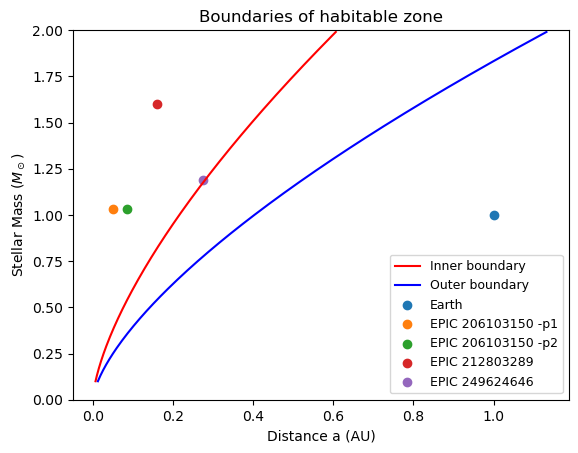

In [30]:
# assume a value for the albedo
albedo=0.85

#create a range of stellar masses 
mstar=np.arange(0.1,2,0.01)

#calcuate inner and outer boundary using the function defined previoulsy
a_inner=boundary(mstar, albedo, 373.)
a_outer=boundary(mstar, albedo, 273.)

# make the plot
#set axis labels
plt.xlabel('Distance a (AU)')
plt.ylabel('Stellar Mass ($M_\odot$)')

#set axes limits
#plt.xlim (0.01, 3)
plt.ylim (0, 2)

#graph title
plt.title('Boundaries of habitable zone')

#plot inner boundary
plt.plot(a_inner, mstar, color='red', label="Inner boundary")
#plot outer boundary
plt.plot(a_outer, mstar, color='blue', label="Outer boundary")
#plot Earth
plt.scatter(1,1,label='Earth')

plt.scatter(a_planet[0], m_star[0],label='EPIC 206103150 -p1')
plt.scatter(a_planet[1], m_star[1],label='EPIC 206103150 -p2')
plt.scatter(a_planet[2], m_star[2],label='EPIC 212803289')
plt.scatter(a_planet[3], m_star[3],label='EPIC 249624646')


plt.legend(loc="lower right",fontsize=9)


plt.show()

In this case one planet falls just inside the habitable zone of its star.

## Task IV-8 (optional)

You may try to analyse the rest of the light curves